## 1. 
Módulo  Kaggle Intro to Machine Learning:

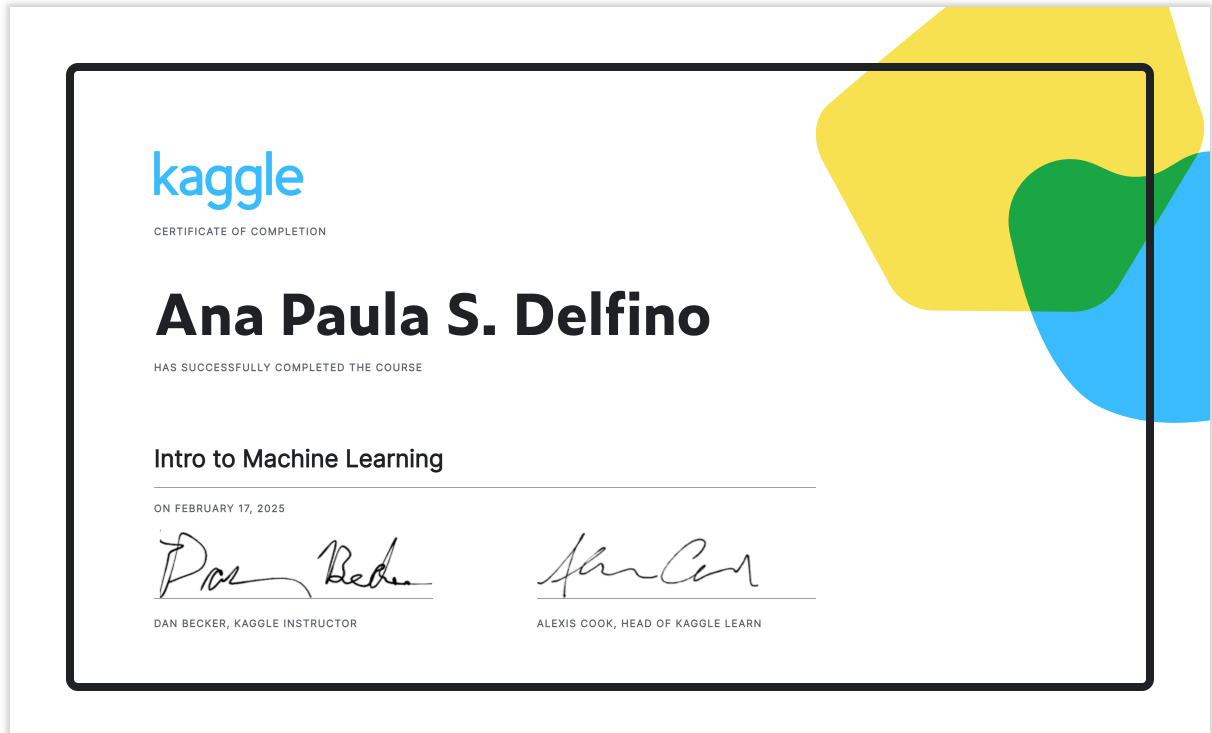

In [1]:
from PIL import Image

image = Image.open('Captura de Tela 2025-02-17 às 13.29.18.png')

image

In [2]:
import pandas as pd
import numpy as np
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
# para normalização - MinMaxScaler
# para padronização normal - StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,  cross_validate
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score

from plot_aux import plot_boxplots_by_columns, plot_by_columns, plot_boxplots_by_columns_hue
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')

/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. 
Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

In [3]:
data = pd.read_csv("winequalityN.csv")

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [5]:
duplicados = data.duplicated().sum() 
print("Duplicados:")
print(duplicados)

Duplicados:
1168


In [6]:
data=data.drop_duplicates()

In [7]:
data['opinion'] = data['quality'].apply(lambda r: 0 if r <= 5 else 1)

In [8]:
df = data[data['type']=='white'].copy()
df = df.drop(columns=['quality', 'type'])

## 3.
Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

`Resposta`: Todas as variáveis são continuas, exceto opnion que é uma variável binária, assumindo valores 0 ou 1.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3962 non-null   float64
 1   volatile_acidity      3963 non-null   float64
 2   citric_acid           3968 non-null   float64
 3   residual_sugar        3968 non-null   float64
 4   chlorides             3968 non-null   float64
 5   free_sulfur_dioxide   3970 non-null   float64
 6   total_sulfur_dioxide  3970 non-null   float64
 7   density               3970 non-null   float64
 8   ph                    3963 non-null   float64
 9   sulphates             3968 non-null   float64
 10  alcohol               3970 non-null   float64
 11  opinion               3970 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 403.2 KB


In [10]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    3962.000000       3963.000000  3968.000000     3968.000000   
mean        6.840876          0.280641     0.334551        5.920489   
std         0.866401          0.103577     0.122480        4.864641   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  3968.000000          3970.000000           3970.000000  3970.000000   
mean      0.045895            34.909698            137.248992     0.993792   
std       0.023085            17.218706             43.133975     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035750            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                ph    sulphates      alcohol      opinion  
count  3963.000000  3968.000000  3970.000000  3970.000000  
mean      3.195309     0.490398    10.588324     0.659698  
std       0.151478     0.113595     1.217302     0.473870  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.480000    10.400000     1.000000  
75%       3.290000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

In [11]:
df.isna().sum()

fixed_acidity           8
volatile_acidity        7
citric_acid             2
residual_sugar          2
chlorides               2
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64

In [12]:
df[df['fixed_acidity'].isna()==True]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
17              NaN              0.66         0.48             1.2      0.029   
174             NaN              0.27         0.31            17.7      0.051   
249             NaN              0.41         0.14            10.4      0.037   
267             NaN              0.58         0.07             6.9      0.043   
368             NaN              0.29         0.48             2.3      0.049   
518             NaN              0.13         0.28             1.9      0.050   
1079            NaN               NaN         0.29             6.2      0.046   
2902            NaN              0.36         0.14             8.9      0.036   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
17                   29.0                  75.0  0.98920  3.33       0.39   
174                  33.0                 173.0  0.99900  3.09       0.64   
249                  18.0                 119.0  0.99600  3.38       0.45   
267                  34.0                 149.0  0.99440  3.34       0.57   
368                  36.0                 178.0  0.99310  3.17       0.64   
518                  20.0                  78.0  0.99180  3.43       0.64   
1079                 29.0                 227.0  0.99520  3.29       0.53   
2902                 38.0                 155.0  0.99622  3.27        NaN   

      alcohol  opinion  
17       12.8        1  
174      10.2        0  
249      10.0        0  
267       9.7        0  
368      10.6        1  
518      10.8        1  
1079     10.1        1  
2902      9.4        0

##  4.A 
Descreva as etapas necessárias para criar um modelo de classificação eficiente.

1. Definição do Problema
- Identificar claramente o objetivo do modelo e as métricas de sucesso técnicas (F1-score, precisão, recall, AUC-ROC) e de negócio .   
2. Coleta e Preparação dos Dados
- Obtenção dos dados: Coletar os dados necessários para a modelagem
- Limpeza: Remover duplicatas, lidar com valores ausentes e tratar outliers
- Transformação: Normalização, padronização ou codificação de variáveis categóricas
- Feature Engineering: Criar novas variáveis relevantes e reduzir a dimensionalidade se necessário.
- Verificar balanceamento dos dados e aplicar técnicas de técnicas de balanceamento de classes, se necessário.
- Divisão dos dados: Separar em treino, validação e teste.
3. Seleção do Modelo e Treinamento
- Escolher algoritmos adequados para o problema
- Ajustar hiperparâmetros usando validação cruzada.
4. Avaliação do Modelo
- Medir desempenho usando métricas  de sucesso
- Comparar diferentes modelos e escolher o mais adequado.
5. Ajustes e Otimização
- Refinar hiperparâmetros dos modelos escolhidos para o problema, observando se há overfitting
- Se necessário pode se testar diferentes representações de features
6. Implementação e Monitoramento
- Implantar em produção 
- Monitorar desempenho e re-treinar o modelo conforme necessário

In [13]:
x = df.drop(['opinion'], axis=1)
y = df[['opinion']]

In [14]:
df['opinion'].value_counts(normalize=True)

opinion
1    0.659698
0    0.340302
Name: proportion, dtype: float64

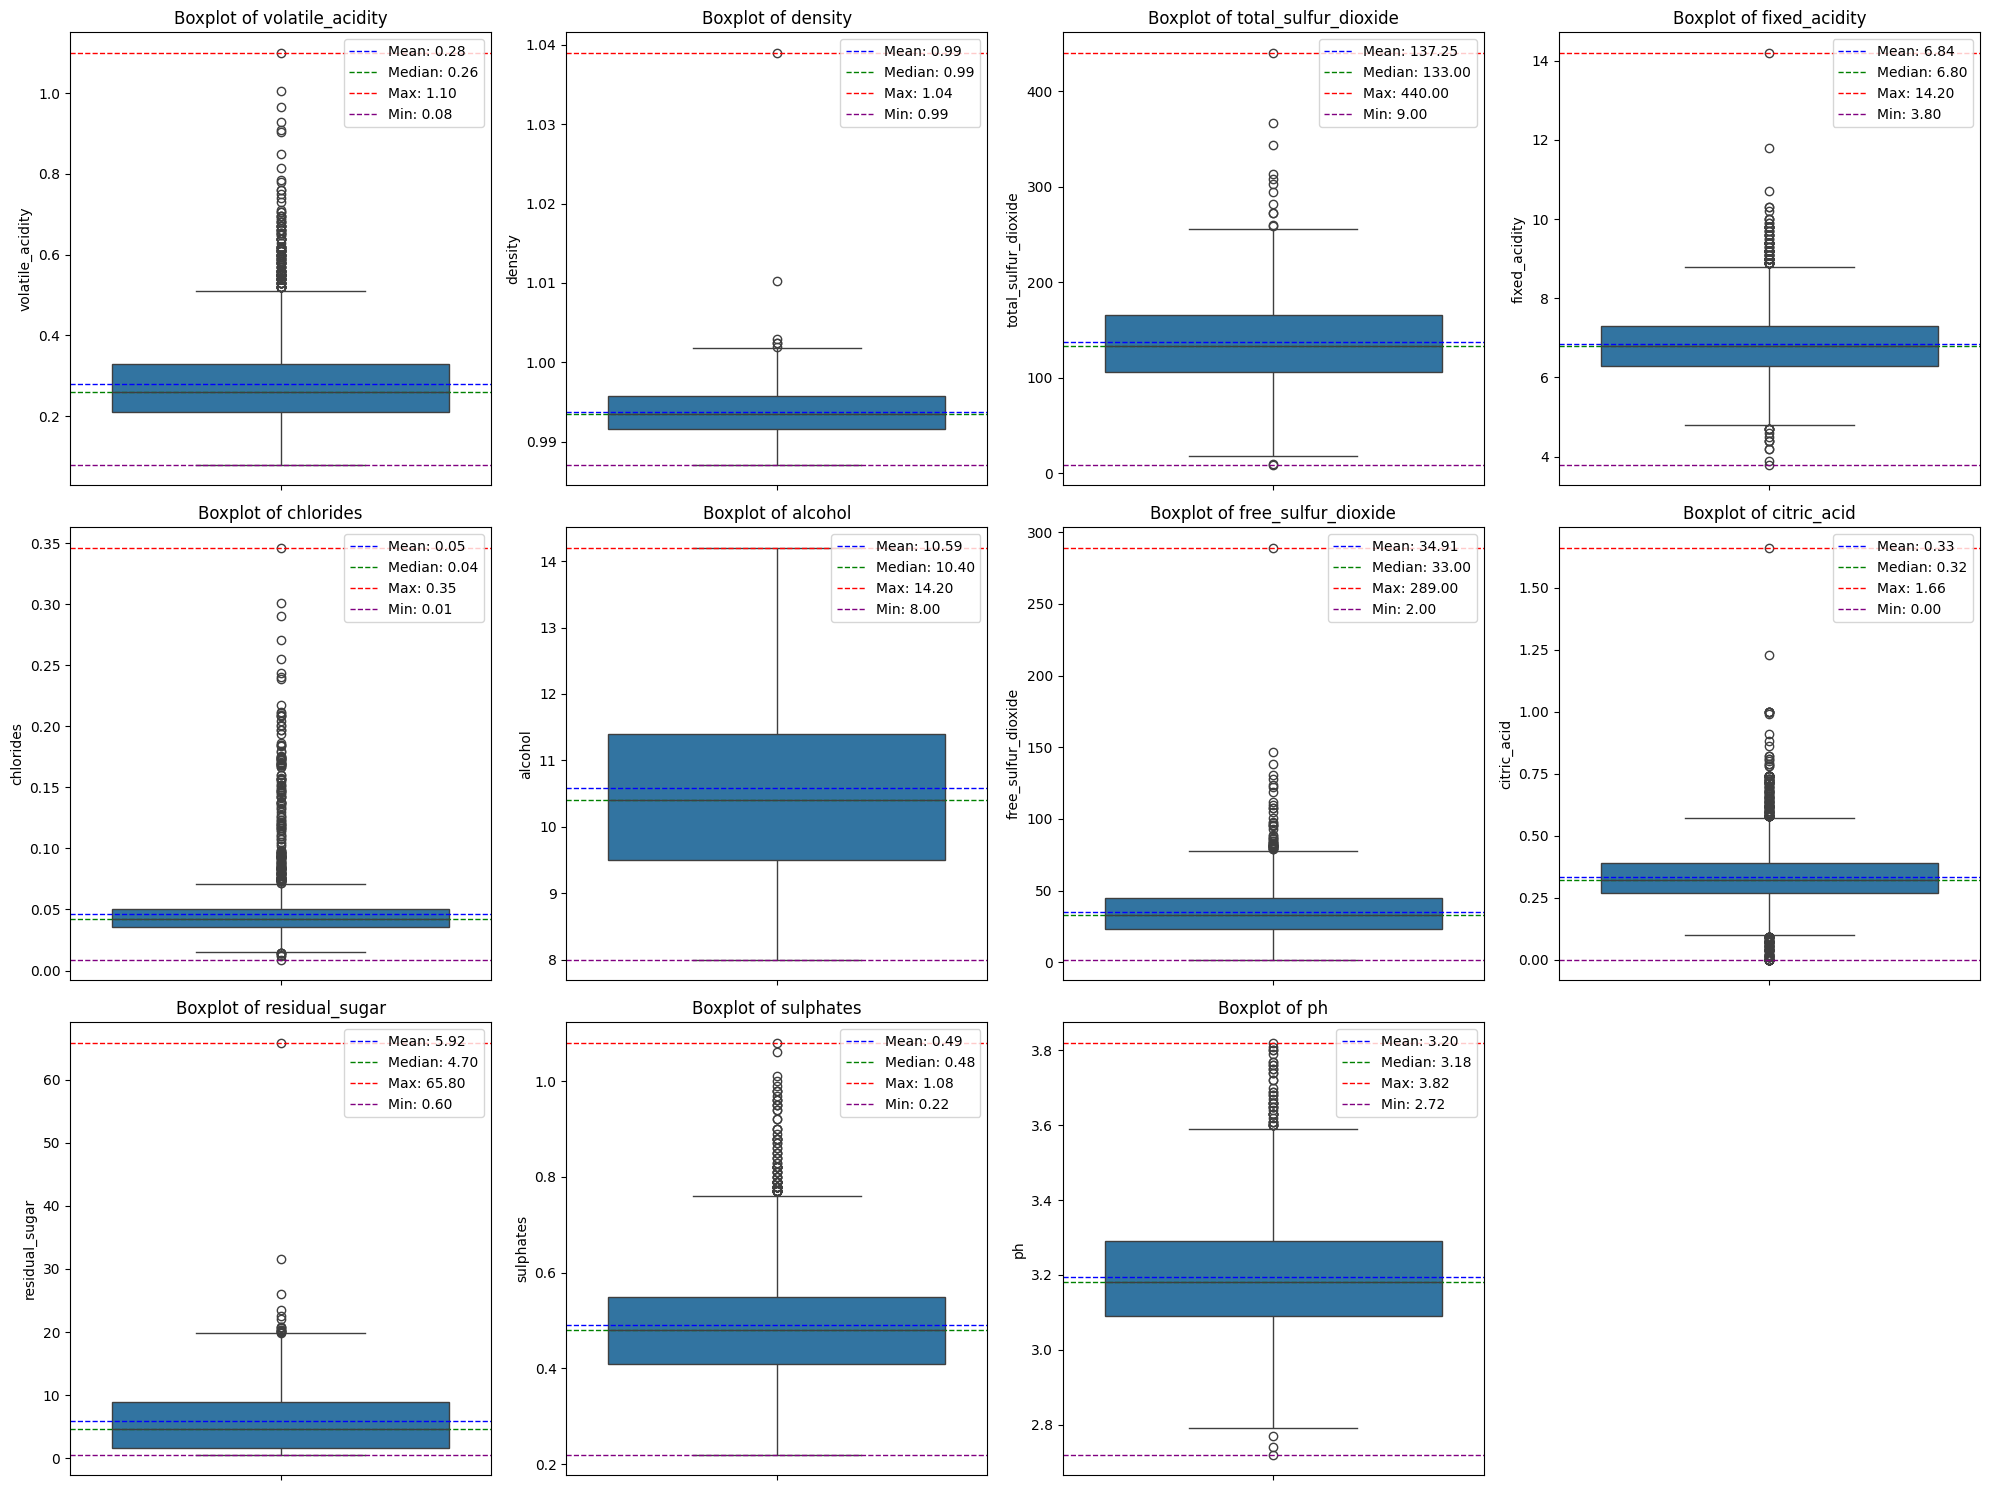

In [15]:
features_list = df.select_dtypes("float").columns.tolist()
plot_boxplots_by_columns(df,features_list)

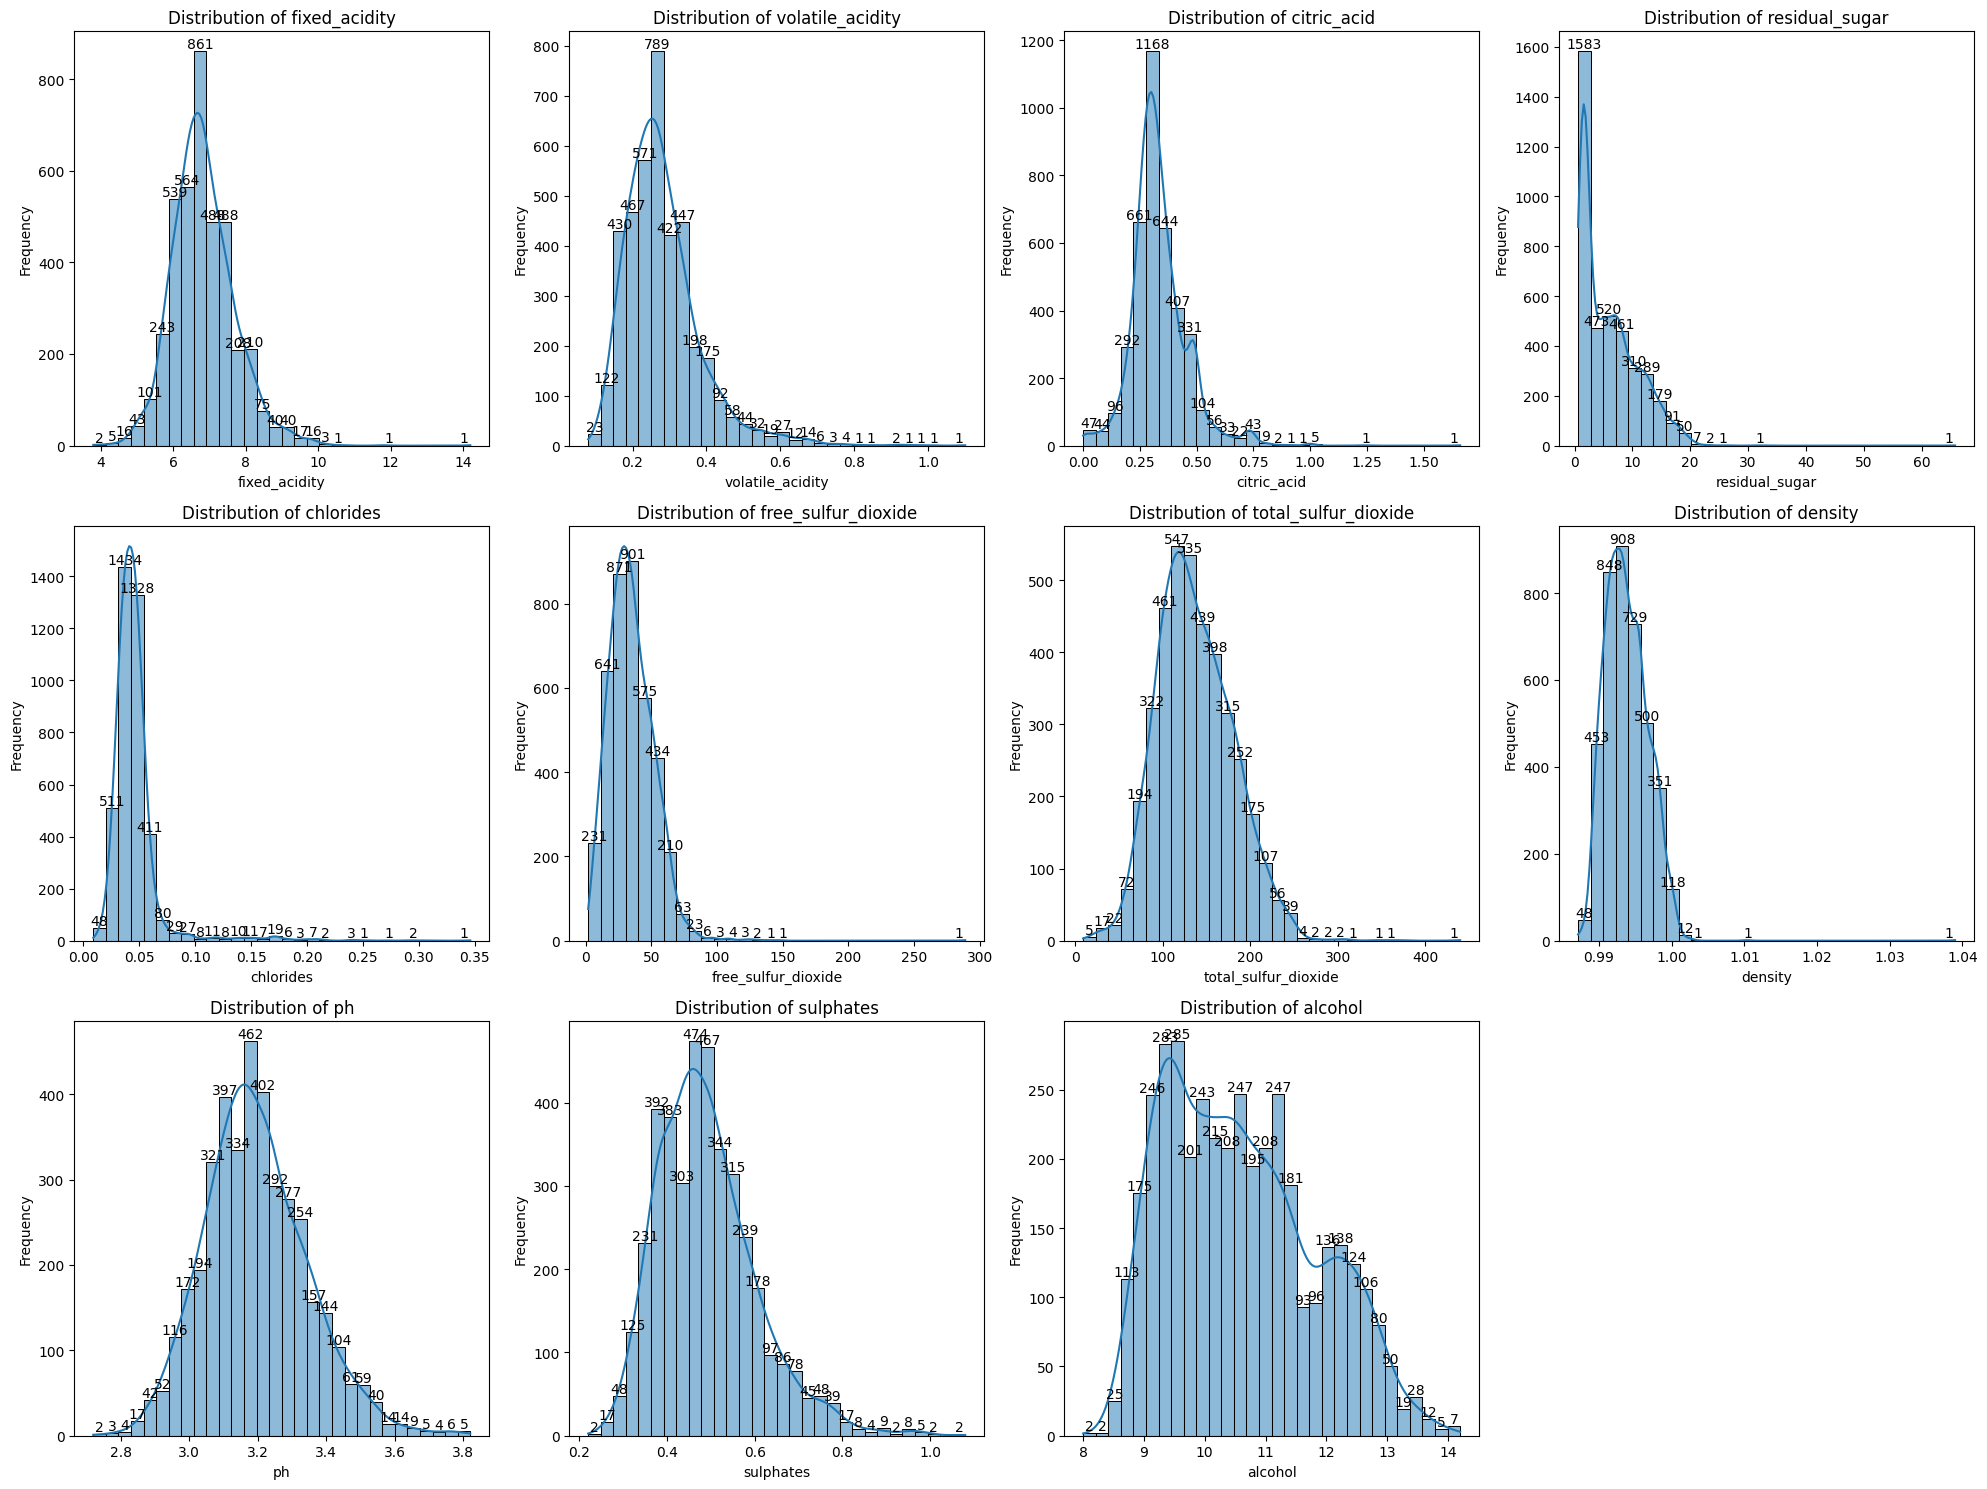

In [16]:
plot_by_columns(df,features_list)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [18]:

def evaluate(best_model, x_test, x_train):
    y_test_predict = best_model.predict(x_test)
    y_train_predict = best_model.predict(x_train)

    print('Desempenho - Base de Treino')
    print(classification_report(y_train, y_train_predict))
    print('Desempenho - Base de Teste')
    print(classification_report(y_test, y_test_predict))
    return y_test_predict, y_train_predict
    
def plot_confusion_matrix(y_test, y_pred):

  conf_matrix = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()
  
def plot_roc_curve(prob_test, model_name):
    fpr, tpr, _ = roc_curve(y_test, [c[1] for c in prob_test])

    plt.plot(fpr, tpr, label='Curva ROC')
    plt.plot([0, 1], [0, 1], label='Classificador Aleatório')
    plt.legend()
    plt.title(f'Curva ROC - {model_name}')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.show()

##  4.B 
Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

In [19]:
def objective_for_logreg(trial, x, y):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    C = trial.suggest_loguniform('C', 0.001, 10)
    l1_ratio = trial.suggest_float('l1_ratio', 0.05, 1) if penalty == 'elasticnet' else None
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    
    model = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('logreg', LogisticRegression(
            solver='saga',
            penalty=penalty,
            C=C,
            l1_ratio=l1_ratio,
            class_weight=class_weight,
            max_iter=1000
        ))
    ])
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0, average='weighted'),
        'recall': make_scorer(recall_score, zero_division=0, average='weighted'),
        'f1': make_scorer(f1_score, zero_division=0, average='weighted')
    }
    
    splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

    
    cv_results = cross_validate(model, x, y, cv=splitter, scoring=scoring, return_estimator=False, n_jobs=-1)
    
    mean_f1 = np.mean(cv_results['test_f1'])
    
    return mean_f1

In [20]:
def get_metrics_cv(best_model, x,y):

    cv_results_best = cross_validate(
        best_model, 
        x, 
        y, 
        cv=StratifiedKFold(
            n_splits=10, 
            shuffle=True, 
            random_state=25),
        scoring={
            'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, zero_division=0, average='weighted'),
            'recall': make_scorer(recall_score, zero_division=0, average='weighted'),
            'f1': make_scorer(f1_score, zero_division=0, average='weighted')
    })

    print("\n--- Melhor Trial (Cross-Validation Results) ---")
    metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
    for metric in metrics:
        mean_value = np.mean(cv_results_best[metric])
        std_value = np.std(cv_results_best[metric])
        print(f"{metric.replace('test_', '').capitalize()}: Média = {mean_value:.4f}, Desvio Padrão = {std_value:.4f}")


In [21]:
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(lambda trial: objective_for_logreg(trial, x_train, y_train), n_trials=1000)
print("Melhores parâmetros:", study_logreg.best_params)

[I 2025-02-20 20:31:03,224] A new study created in memory with name: no-name-ad948e6d-23be-4fd2-9aff-6c48d5768425
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/anapaula/projects/infnet_cl

Melhores parâmetros: {'penalty': 'l2', 'C': 0.08667589215231668, 'class_weight': 'balanced'}


In [22]:
study_logreg.best_params

{'penalty': 'l2', 'C': 0.08667589215231668, 'class_weight': 'balanced'}

In [23]:
best_params_logreg = study_logreg.best_trial.params

best_model_reglog = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('logreg', LogisticRegression(
            solver='saga',
            penalty=best_params_logreg['penalty'],
            C=best_params_logreg['C'],
            l1_ratio=best_params_logreg.get('l1_ratio', None),
            class_weight=best_params_logreg['class_weight']
        ))
    ])

best_model_reglog.fit(x, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('logreg',
                 LogisticRegression(C=0.08667589215231668,
                                    class_weight='balanced', solver='saga'))])

In [24]:
print("\n Modelo Regressão Logística")
get_metrics_cv(best_model_reglog, x_train, y_train)


 Modelo Regressão Logística

--- Melhor Trial (Cross-Validation Results) ---
Accuracy: Média = 0.7330, Desvio Padrão = 0.0330
Precision: Média = 0.7606, Desvio Padrão = 0.0298
Recall: Média = 0.7330, Desvio Padrão = 0.0330
F1: Média = 0.7391, Desvio Padrão = 0.0320


In [25]:
y_test_predict, y_train_predict = evaluate(best_model_reglog, x_test, x_train)


Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       946
           1       0.85      0.72      0.78      1833

    accuracy                           0.73      2779
   macro avg       0.72      0.74      0.72      2779
weighted avg       0.76      0.73      0.74      2779

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       405
           1       0.85      0.71      0.77       786

    accuracy                           0.73      1191
   macro avg       0.71      0.73      0.71      1191
weighted avg       0.75      0.73      0.73      1191



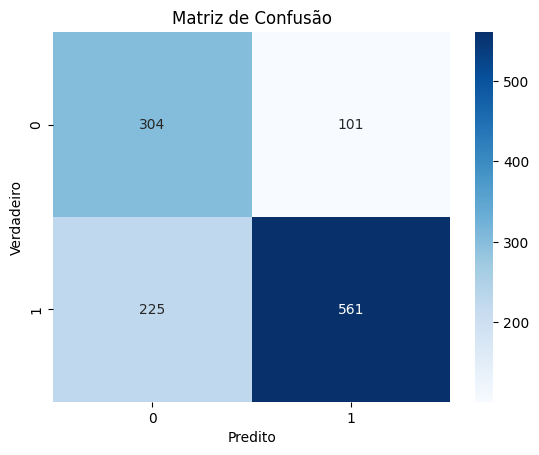

In [26]:
plot_confusion_matrix(y_test, y_test_predict)

Área abaixo da curva - AUC ROC - Regressão logistica:  0.8008


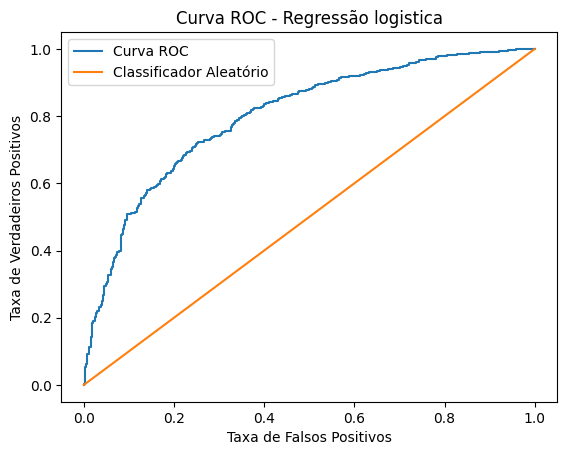

In [27]:
prob_test_reglog = best_model_reglog.predict_proba(x_test)

print('Área abaixo da curva - AUC ROC - Regressão logistica: ', round(roc_auc_score(y_test, [c[1] for c in prob_test_reglog]), 4))
plot_roc_curve(prob_test_reglog, 'Regressão logistica')

##  4.C
Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

In [28]:
def objective_for_dt(trial, x, y):
    criterion= trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth=trial.suggest_int('max_depth', low=1, high=20, step=1)
    class_weight=trial.suggest_categorical('class_weight', ['balanced', None])
    min_samples_leaf=trial.suggest_int('min_samples_leaf', low=2, high=10, step=1)
    min_samples_split=trial.suggest_int('min_samples_split', low=2, high=10, step=1)
    
    model = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('dt', DecisionTreeClassifier(
            random_state=25,
            criterion=criterion,
            max_depth=max_depth,
            class_weight=class_weight,
            min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split
        ))
    ])
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0, average='weighted'),
        'recall': make_scorer(recall_score, zero_division=0, average='weighted'),
        'f1': make_scorer(f1_score, zero_division=0, average='weighted')
    }
    
    splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

    
    cv_results = cross_validate(model, x, y, cv=splitter, scoring=scoring, return_estimator=False, n_jobs=-1)
    
    mean_f1 = np.mean(cv_results['test_f1'])
    
    return mean_f1


In [29]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(lambda trial: objective_for_dt(trial, x_train, y_train), n_trials=1000)
print("Melhores parâmetros:", study_dt.best_params)

[I 2025-02-20 20:32:27,993] A new study created in memory with name: no-name-1bb162cd-9267-4e10-bfa9-508c9b4eb54b
[I 2025-02-20 20:32:28,083] Trial 0 finished with value: 0.6869424922255585 and parameters: {'criterion': 'gini', 'max_depth': 18, 'class_weight': None, 'min_samples_leaf': 5, 'min_samples_split': 6}. Best is trial 0 with value: 0.6869424922255585.
[I 2025-02-20 20:32:28,148] Trial 1 finished with value: 0.7112770366627921 and parameters: {'criterion': 'entropy', 'max_depth': 11, 'class_weight': 'balanced', 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 1 with value: 0.7112770366627921.
[I 2025-02-20 20:32:28,199] Trial 2 finished with value: 0.7268546858760823 and parameters: {'criterion': 'gini', 'max_depth': 4, 'class_weight': 'balanced', 'min_samples_leaf': 2, 'min_samples_split': 2}. Best is trial 2 with value: 0.7268546858760823.
[I 2025-02-20 20:32:28,263] Trial 3 finished with value: 0.7020365142701949 and parameters: {'criterion': 'gini', 'max_depth'

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 4, 'class_weight': None, 'min_samples_leaf': 8, 'min_samples_split': 4}


In [30]:
study_dt.best_params

{'criterion': 'gini',
 'max_depth': 4,
 'class_weight': None,
 'min_samples_leaf': 8,
 'min_samples_split': 4}

In [31]:
best_params_dt = study_dt.best_trial.params

best_model_dt = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('dt', DecisionTreeClassifier(
            random_state=25,
            criterion=best_params_dt.get('criterion'),
            max_depth=best_params_dt.get('max_depth'),
            class_weight=best_params_dt.get('class_weight'),
            min_samples_leaf=best_params_dt.get('min_samples_leaf'),
            min_samples_split=best_params_dt.get('min_samples_split')
        ))
    ])

best_model_dt.fit(x, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('dt',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=8,
                                        min_samples_split=4,
                                        random_state=25))])

In [32]:
print("\n Modelo Decision Tree")
get_metrics_cv(best_model_dt, x_train, y_train)


 Modelo Decision Tree

--- Melhor Trial (Cross-Validation Results) ---
Accuracy: Média = 0.7359, Desvio Padrão = 0.0232
Precision: Média = 0.7367, Desvio Padrão = 0.0246
Recall: Média = 0.7359, Desvio Padrão = 0.0232
F1: Média = 0.7343, Desvio Padrão = 0.0235


In [33]:
y_test_predict_dt, y_train_predict_dt = evaluate(best_model_dt, x_test, x_train)

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       946
           1       0.80      0.85      0.82      1833

    accuracy                           0.76      2779
   macro avg       0.73      0.72      0.72      2779
weighted avg       0.75      0.76      0.75      2779

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       405
           1       0.81      0.84      0.82       786

    accuracy                           0.76      1191
   macro avg       0.74      0.73      0.73      1191
weighted avg       0.76      0.76      0.76      1191



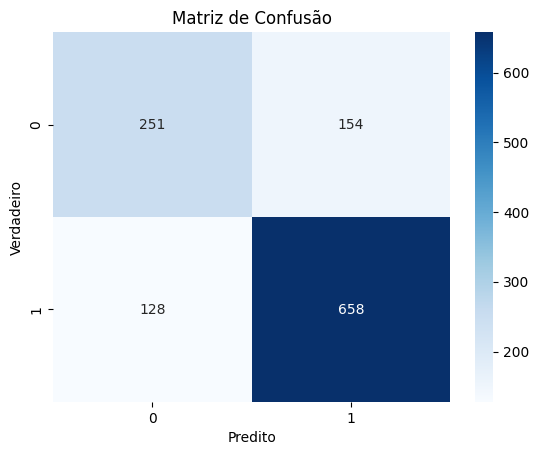

In [34]:
plot_confusion_matrix(y_test, y_test_predict_dt)

Área abaixo da curva - AUC ROC - Decision Tree:  0.8097


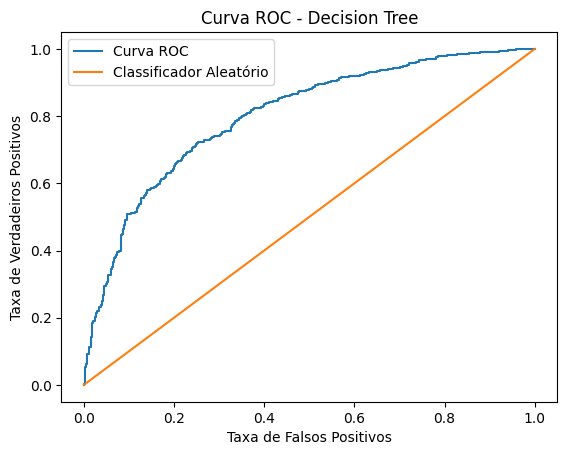

In [35]:
prob_test_dt = best_model_dt.predict_proba(x_test)

print('Área abaixo da curva - AUC ROC - Decision Tree: ', round(roc_auc_score(y_test, [c[1] for c in prob_test_dt]), 4))
plot_roc_curve(prob_test_reglog, 'Decision Tree')


##  4.D
Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
- i. a média e desvio da acurácia dos modelos obtidos;
- ii. a média e desvio da precisão dos modelos obtidos;
- iii. a média e desvio da recall dos modelos obtidos;
- iv. a média e desvio do f1-score dos modelos obtidos.

In [36]:
def objective_for_svc(trial, x, y):
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'sigmoid', 'poly']) 
    C = trial.suggest_loguniform('C', 0.001, 50)
    gamma = trial.suggest_float('gamma', 0.001, 1)
    degree = trial.suggest_int('degree', low=2, high=4, step=1)
    
    model = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('svc', SVC(
            random_state=25,
            class_weight=class_weight,
            kernel=kernel,
            C=C,
            gamma=gamma,
            degree=degree,
            max_iter=10000
        ))
    ])
    
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0, average='weighted'),
        'recall': make_scorer(recall_score, zero_division=0, average='weighted'),
        'f1': make_scorer(f1_score, zero_division=0, average='weighted')
    }
    
    splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
    cv_results = cross_validate(model, x, y, cv=splitter, scoring=scoring, return_estimator=False, n_jobs=-1)
    
    mean_f1 = np.mean(cv_results['test_f1'])
    
    return mean_f1

In [37]:
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(lambda trial: objective_for_svc(trial, x_train, y_train), n_trials=1000)
print("Melhores parâmetros:", study_svc.best_params)

[I 2025-02-20 20:33:27,738] A new study created in memory with name: no-name-28f75a1e-4e5f-4416-976f-96288ece467d
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/anapaula/projects/infnet_classificacao/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

Melhores parâmetros: {'class_weight': None, 'kernel': 'rbf', 'C': 1.2797990875295049, 'gamma': 0.1995692177972468, 'degree': 2}


In [38]:
study_svc.best_params

{'class_weight': None,
 'kernel': 'rbf',
 'C': 1.2797990875295049,
 'gamma': 0.1995692177972468,
 'degree': 2}

In [39]:
best_params_svc = study_svc.best_trial.params

best_model_svc = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('svc',  SVC(
            random_state=25,
            class_weight=best_params_svc.get('class_weight'),
            kernel=best_params_svc.get('kernel'),
            C=best_params_svc.get('C'),
            gamma=best_params_svc.get('gamma'),
            degree=best_params_svc.get('degree'),
            probability=True
        ))
    ])

best_model_svc.fit(x, y)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('svc',
                 SVC(C=1.2797990875295049, degree=2, gamma=0.1995692177972468,
                     probability=True, random_state=25))])

In [40]:
print("\n Modelo SVM")
get_metrics_cv(best_model_svc, x_train, y_train)


 Modelo SVM

--- Melhor Trial (Cross-Validation Results) ---
Accuracy: Média = 0.7747, Desvio Padrão = 0.0206
Precision: Média = 0.7710, Desvio Padrão = 0.0226
Recall: Média = 0.7747, Desvio Padrão = 0.0206
F1: Média = 0.7698, Desvio Padrão = 0.0201


In [41]:
y_test_predict_svc, y_train_predict_svc = evaluate(best_model_svc, x_test, x_train)

Desempenho - Base de Treino
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       946
           1       0.84      0.91      0.88      1833

    accuracy                           0.83      2779
   macro avg       0.82      0.79      0.80      2779
weighted avg       0.83      0.83      0.82      2779

Desempenho - Base de Teste
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       405
           1       0.85      0.92      0.88       786

    accuracy                           0.84      1191
   macro avg       0.83      0.80      0.81      1191
weighted avg       0.83      0.84      0.83      1191



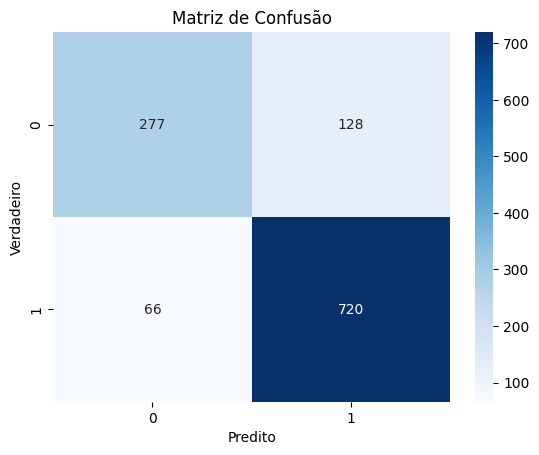

In [42]:
plot_confusion_matrix(y_test, y_test_predict_svc)

Área abaixo da curva - AUC ROC - SVM  0.8893


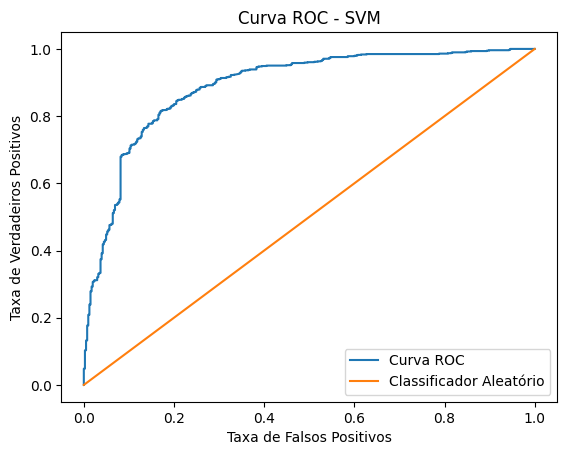

In [43]:
prob_test_svc = best_model_svc.predict_proba(x_test)

print('Área abaixo da curva - AUC ROC - SVM ', round(roc_auc_score(y_test, [c[1] for c in prob_test_svc]), 4))
plot_roc_curve(prob_test_svc, 'SVM')

## 5. 

Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

`Resposta`: O modelo escolhido seria o SVM por apresentar as melhores métricas de performance.

In [44]:
def plot_roc_curve_all_models(prob_test_model1, prob_test_model2, prob_test_model3, y_test, model_names):
    fpr1, tpr1, _ = roc_curve(y_test, [c[1] for c in prob_test_model1])
    fpr2, tpr2, _ = roc_curve(y_test, [c[1] for c in prob_test_model2])
    fpr3, tpr3, _ = roc_curve(y_test, [c[1] for c in prob_test_model3])
    
    plt.plot(fpr1, tpr1, label=f'ROC Curve - {model_names[0]}')
    plt.plot(fpr2, tpr2, label=f'ROC Curve - {model_names[1]}')
    plt.plot(fpr3, tpr3, label=f'ROC Curve - {model_names[2]}')
    plt.plot([0, 1], [0, 1], label='Random Classifier', linestyle='--')
    
    plt.legend()
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

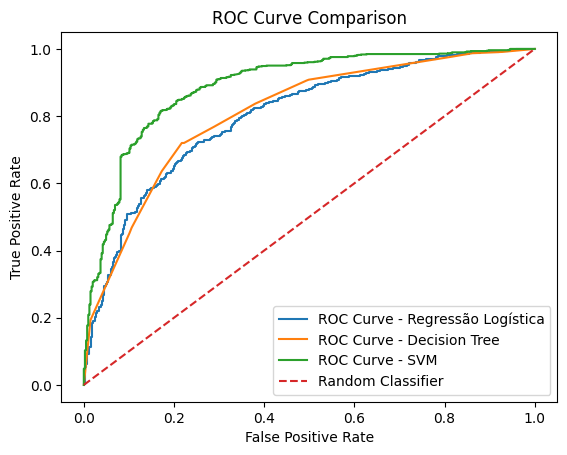

In [45]:
plot_roc_curve_all_models(
    prob_test_model1=prob_test_reglog, 
    prob_test_model2=prob_test_dt, 
    prob_test_model3=prob_test_svc, 
    y_test=y_test, 
    model_names=['Regressão Logística','Decision Tree','SVM'])

## 6.
Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

`Resposta`: O desempenho não é o mesmo, o desempenho é bem menor. As características dos vinhos tintos são diferentes dos vinhos brancos, como pode ser observado do boxplot. Com isso, é esperado que o desempenho seja menor, para melhorar o desempenho o modelo deveria ser treinado com os dados dos vinhos tintos. 

In [46]:
df_red = data[data['type']=='red'].copy()
df_red = df_red.drop(columns=['quality', 'type'])


In [47]:
x_red = df_red.drop(['opinion'], axis=1)
y_red = df_red[['opinion']]

In [48]:
y_red_predict = best_model_dt.predict(x_red)

In [49]:
print(classification_report(y_red, y_red_predict))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       640
           1       0.77      0.48      0.59       719

    accuracy                           0.65      1359
   macro avg       0.68      0.66      0.64      1359
weighted avg       0.68      0.65      0.64      1359



In [50]:
prob_red_dt = best_model_dt.predict_proba(x_red)

print('Área abaixo da curva - AUC ROC - SVM - RED', round(roc_auc_score(y_red, [c[1] for c in prob_red_dt]), 4))


Área abaixo da curva - AUC ROC - SVM - RED 0.7421


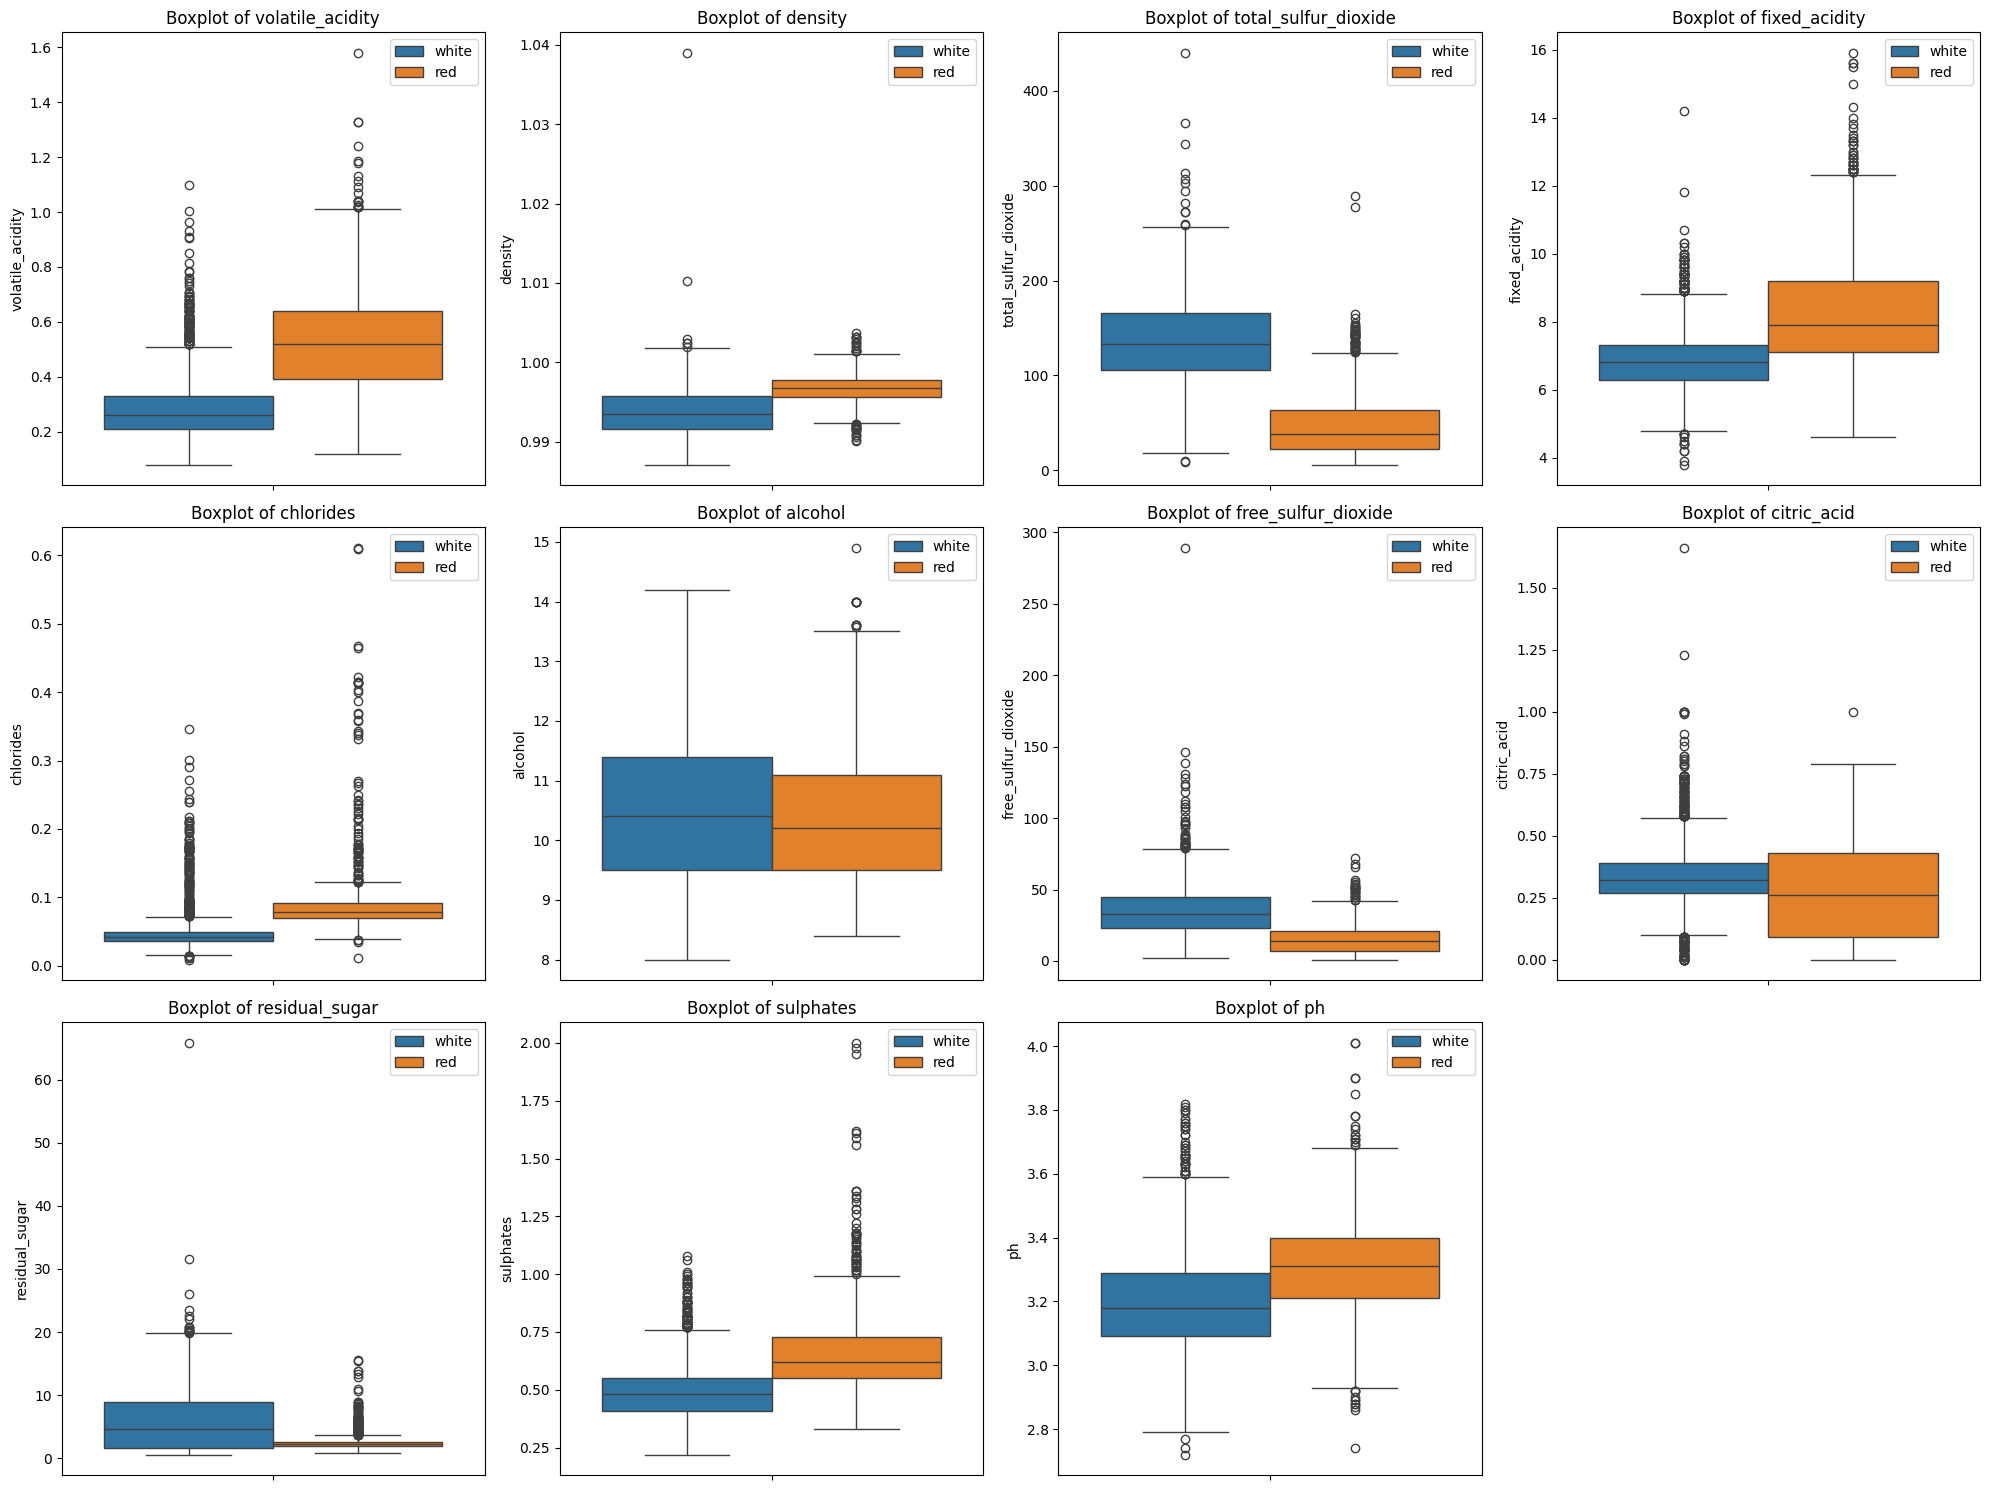

In [51]:
plot_boxplots_by_columns_hue(data, features_list, hue='type')